# Support Vector Machine

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## RandomSearch (ROC AUC max)

### Tunability Analysis

In [37]:
# load data 
svm_1_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_1.csv')
svm_2_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_2.csv')
svm_3_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_3.csv')
svm_4_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_4.csv')

svm_1_random = svm_1_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_1_random.columns = ['roc_auc_1', 'kernel','C','gamma','degree']
svm_2_random = svm_2_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_2_random.columns = ['roc_auc_2', 'kernel','C','gamma','degree']
svm_3_random = svm_3_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_3_random.columns = ['roc_auc_3', 'kernel','C','gamma','degree']
svm_4_random = svm_4_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_4_random.columns = ['roc_auc_4', 'kernel','C','gamma','degree']

# we dont do scaling for roc_auc, because it does not make sense

In [38]:
# find the best parameters for each dataset (theta_star_1, theta_star_2, theta_star_3, theta_star_4)
theta_star_1 = svm_1_random.loc[svm_1_random['roc_auc_1'].idxmax()]
theta_star_2 = svm_2_random.loc[svm_2_random['roc_auc_2'].idxmax()]
theta_star_3 = svm_3_random.loc[svm_3_random['roc_auc_3'].idxmax()]
theta_star_4 = svm_4_random.loc[svm_4_random['roc_auc_4'].idxmax()]

print(theta_star_1)
print('----------------')
print(theta_star_2)
print('----------------')
print(theta_star_3)
print('----------------')
print(theta_star_4)


roc_auc_1    0.847658
kernel         linear
C            0.007812
gamma           128.0
degree              3
Name: 295, dtype: object
----------------
roc_auc_2    0.552477
kernel            rbf
C                 8.0
gamma            32.0
degree              4
Name: 207, dtype: object
----------------
roc_auc_3    0.785219
kernel        sigmoid
C            0.001953
gamma        0.000977
degree              2
Name: 2, dtype: object
----------------
roc_auc_4    0.737892
kernel         linear
C            0.003906
gamma        0.003906
degree              2
Name: 300, dtype: object


In [39]:
# find the best parameters (theta_star) for 4 our datasets on average

svm_random = pd.concat([svm_1_random[['kernel','C','gamma','degree']], svm_1_random[['roc_auc_1']], svm_2_random[['roc_auc_2']], svm_3_random[['roc_auc_3']], svm_4_random[['roc_auc_4']]], axis=1)

svm_random['mean_roc_auc_all_4'] = svm_random[['roc_auc_1', 'roc_auc_2', 'roc_auc_3', 'roc_auc_4']].mean(axis=1)
svm = svm_random.sort_values(by='mean_roc_auc_all_4', ascending=False)

theta_star = svm.loc[svm_random['mean_roc_auc_all_4'].idxmax()]
# So the best parameters of SVM for these 4 datasets on average are theta_star
print(theta_star)

kernel                 sigmoid
C                     0.001953
gamma                 0.000977
degree                       2
roc_auc_1             0.843982
roc_auc_2             0.496137
roc_auc_3             0.785219
roc_auc_4             0.724614
mean_roc_auc_all_4    0.712488
Name: 2, dtype: object


In [40]:
# overall tunability of SVM per dataset, when theta_star is taken from our parameters grid

# our R function is -roc_auc so:
d_1 = -theta_star['roc_auc_1']-(-theta_star_1['roc_auc_1'])
d_2 = -theta_star['roc_auc_2']-(-theta_star_2['roc_auc_2'])
d_3 = -theta_star['roc_auc_3']-(-theta_star_3['roc_auc_3'])
d_4 = -theta_star['roc_auc_4']-(-theta_star_4['roc_auc_4'])

print('tunability of SVM for dataset 1:', d_1)
print('tunability of SVM for dataset 2:', d_2)
print('tunability of SVM for dataset 3:', d_3)
print('tunability of SVM for dataset 4:', d_4)

svm_tunability_random_search = [d_1, d_2, d_3, d_4]

tunability of SVM for dataset 1: 0.003676874591858059
tunability of SVM for dataset 2: 0.0563394134626124
tunability of SVM for dataset 3: 0.0
tunability of SVM for dataset 4: 0.013278137716415506


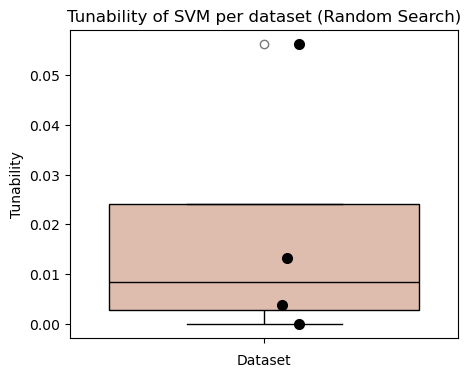

In [41]:
# BoxPlot x Jitter Strips of tunability of SVM per dataset (theta_star is taken from our parameters grid)
plt.figure(figsize=(5, 4))

sns.boxplot(data=svm_tunability_random_search, color="#E6B9A6", boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
sns.stripplot(data=svm_tunability_random_search, jitter=True, color="black", size=8, edgecolor='black')
plt.title('Tunability of SVM per dataset (Random Search)')
plt.ylabel('Tunability')
plt.xlabel('Dataset')
plt.show()



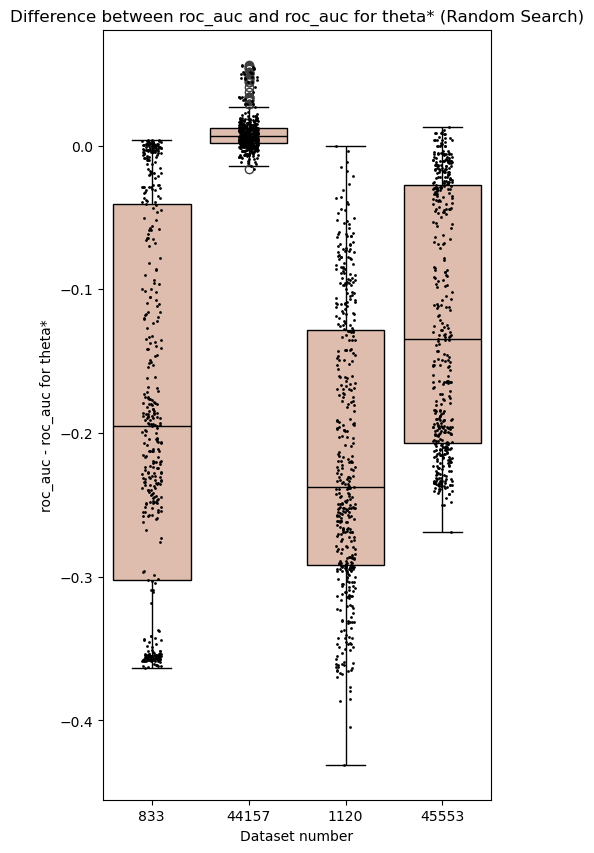

In [42]:
# roc_auc_minus_roc_auc_for_best_theta_on_average for each dataset
data_for_plot = pd.DataFrame()
data_for_plot['833']=svm_1_random['roc_auc_1']-theta_star['roc_auc_1']
data_for_plot['44157']=svm_2_random['roc_auc_2']-theta_star['roc_auc_2']
data_for_plot['1120']=svm_3_random['roc_auc_3']-theta_star['roc_auc_3']
data_for_plot['45553']=svm_4_random['roc_auc_4']-theta_star['roc_auc_4']

# BoxPlot x Jitter Strips of Difference between roc_auc and roc_auc for theta* (Random Search) for each dataset
plt.figure(figsize=(5, 10))

sns.boxplot(data=data_for_plot, color="#E6B9A6", boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
sns.stripplot(data=data_for_plot, jitter=True, color="black", size=2, edgecolor='black')
plt.title('Difference between roc_auc and roc_auc for theta* (Random Search)')
plt.ylabel('roc_auc - roc_auc for theta*')
plt.xlabel('Dataset number')
plt.show()

## BayesSearch (ROC AUC max)

In [43]:
# load data
svm_1_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_1.csv')
svm_2_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_2.csv')
svm_3_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_3.csv')
svm_4_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_4.csv')

svm_1_bayes = svm_1_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_1_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_1']
svm_2_bayes = svm_2_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_2_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_2']
svm_3_bayes = svm_3_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_3_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_3']
svm_4_bayes = svm_4_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_4_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_4']

### Iterations vs roc_auc

In [44]:
def get_max_auc(n_iter, dataset, col_name):
    dataset = dataset.head(n_iter)
    return dataset[col_name].max()

max_auc_interations_1_random= np.array([get_max_auc(i, svm_1_random, 'roc_auc_1') for i in range(1, 449)])
max_auc_interations_2_random = np.array([get_max_auc(i, svm_2_random, 'roc_auc_2') for i in range(1, 449)])
max_auc_interations_3_random = np.array([get_max_auc(i, svm_3_random, 'roc_auc_3') for i in range(1, 449)])
max_auc_interations_4_random = np.array([get_max_auc(i, svm_4_random, 'roc_auc_4') for i in range(1, 449)])

max_auc_interations_1_bayes = np.array([get_max_auc(i, svm_1_bayes, 'roc_auc_1') for i in range(1, 100)])
max_auc_interations_2_bayes = np.array([get_max_auc(i, svm_2_bayes, 'roc_auc_2') for i in range(1, 100)])
max_auc_interations_3_bayes = np.array([get_max_auc(i, svm_3_bayes, 'roc_auc_3') for i in range(1, 100)])
max_auc_interations_4_bayes = np.array([get_max_auc(i, svm_4_bayes, 'roc_auc_4') for i in range(1, 100)])

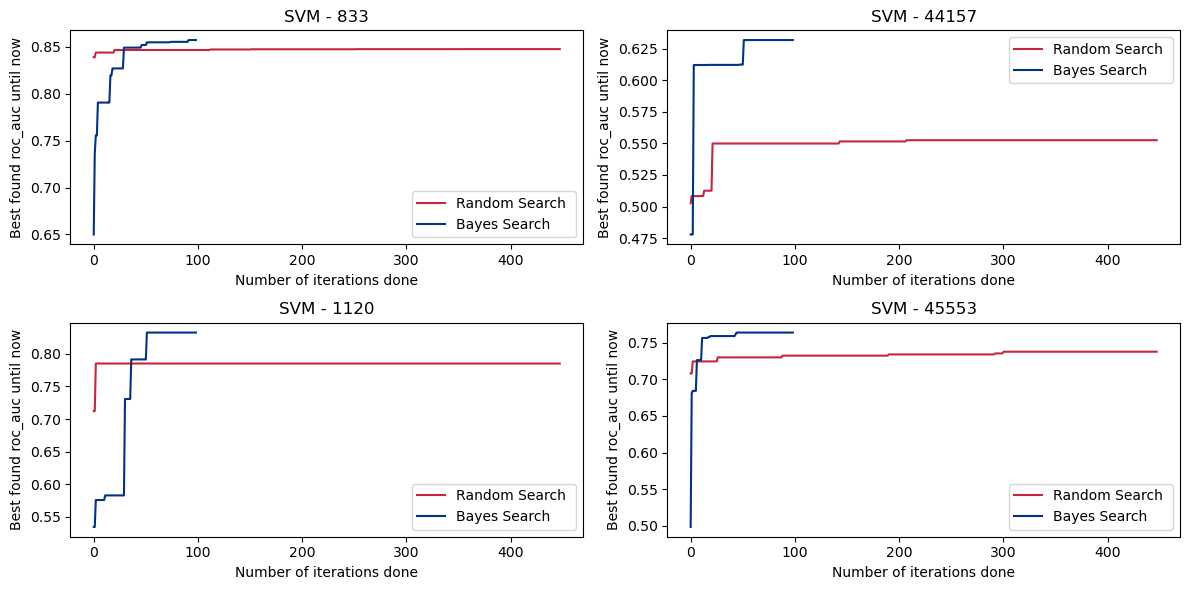

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].plot(max_auc_interations_1_random, color='#C7253E', label='Random Search ')
axs[0, 0].plot(max_auc_interations_1_bayes, color='#003285', label='Bayes Search ')
axs[0, 0].set_title('SVM - 833')
axs[0, 0].set_xlabel('Number of iterations done')
axs[0, 0].set_ylabel('Best found roc_auc until now')
axs[0, 0].legend()

axs[0, 1].plot(max_auc_interations_2_random, color='#C7253E', label='Random Search ')
axs[0, 1].plot(max_auc_interations_2_bayes, color='#003285', label='Bayes Search ')
axs[0, 1].set_title('SVM - 44157')
axs[0, 1].set_xlabel('Number of iterations done')
axs[0, 1].set_ylabel('Best found roc_auc until now')
axs[0, 1].legend()

axs[1, 0].plot(max_auc_interations_3_random, color='#C7253E', label='Random Search ')
axs[1, 0].plot(max_auc_interations_3_bayes, color='#003285', label='Bayes Search ')
axs[1, 0].set_title('SVM - 1120')
axs[1, 0].set_xlabel('Number of iterations done')
axs[1, 0].set_ylabel('Best found roc_auc until now')
axs[1, 0].legend()

axs[1, 1].plot(max_auc_interations_4_random, color='#C7253E', label='Random Search ')
axs[1, 1].plot(max_auc_interations_4_bayes, color='#003285', label='Bayes Search ')
axs[1, 1].set_title('SVM - 45553')
axs[1, 1].set_xlabel('Number of iterations done')
axs[1, 1].set_ylabel('Best found roc_auc until now')
axs[1, 1].legend()

plt.tight_layout()
plt.show()